In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.collections import LineCollection
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
# Importation du jeu de données
data = pd.read_csv("fr.openfoodfacts.org.products.csv", sep='\t')

/var/folders/xt/s64lptzd6js02z9ywj1ydl8m0000gn/T/ipykernel_40666/792794404.py:2: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("fr.openfoodfacts.org.products.csv", sep='\t')


In [3]:
data.shape

(320772, 162)

In [4]:
data.head

<bound method NDFrame.head of                  code                                                url  \
0                3087  http://world-fr.openfoodfacts.org/produit/0000...   
1                4530  http://world-fr.openfoodfacts.org/produit/0000...   
2                4559  http://world-fr.openfoodfacts.org/produit/0000...   
3               16087  http://world-fr.openfoodfacts.org/produit/0000...   
4               16094  http://world-fr.openfoodfacts.org/produit/0000...   
...               ...                                                ...   
320767  9948282780603  http://world-fr.openfoodfacts.org/produit/9948...   
320768       99567453  http://world-fr.openfoodfacts.org/produit/9956...   
320769  9970229501521  http://world-fr.openfoodfacts.org/produit/9970...   
320770  9980282863788  http://world-fr.openfoodfacts.org/produit/9980...   
320771   999990026839  http://world-fr.openfoodfacts.org/produit/9999...   

                           creator   created_t      creat

In [5]:
# Identification des doublons
duplicate_rows = data[data.duplicated()]
print(f'{len(duplicate_rows)}')

0


In [6]:
# Identification des valeurs manquantes
total_values = data.shape[0]
missing_values_percentage = (data.isnull().sum() / total_values) * 100

# Compte les variables avec 100%, 75% ou plus, et 50% ou plus de valeurs manquantes
variables_with_100_percent_missing = missing_values_percentage[missing_values_percentage == 100].index
variables_with_75_percent_or_more_missing = missing_values_percentage[missing_values_percentage >= 75].index
variables_with_50_percent_or_more_missing = missing_values_percentage[missing_values_percentage >= 50].index

print(f'Variables avec 100% de valeurs manquantes: {len(variables_with_100_percent_missing)}/162')
print(f'Variables avec 75% ou plus de valeurs manquantes: {len(variables_with_75_percent_or_more_missing)}/162')
print(f'Variables avec 50% ou plus de valeurs manquantes: {len(variables_with_50_percent_or_more_missing)}/162')

Variables avec 100% de valeurs manquantes: 16/162
Variables avec 75% ou plus de valeurs manquantes: 112/162
Variables avec 50% ou plus de valeurs manquantes: 128/162


In [7]:
# Suppression des colonnes contenant 100% de valeurs manquantes
data_cleaned = data.dropna(axis=1, how='all')
old_data = data
data = data_cleaned
data.shape

(320772, 146)

In [8]:
# Identification des doublons
duplicate_rows = data[data.duplicated()]
print(f'{len(duplicate_rows)}')

0


In [9]:
# Exemple traitement des valeurs manquantes : remplacement par 0 dans la colonne cocoa_100g
data["cocoa_100g"] = data["cocoa_100g"].fillna(0)
missing_values_in_column_cocoa_100g = data["cocoa_100g"].isnull().any()
print(missing_values_in_column_cocoa_100g)

False


/var/folders/xt/s64lptzd6js02z9ywj1ydl8m0000gn/T/ipykernel_40666/645487657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["cocoa_100g"] = data["cocoa_100g"].fillna(0)


In [10]:
# Exemple traitement des valeurs manquantes : remplacement par la moyenne dans la colonne iron_100g
# Calculer la moyenne de la colonne 'iron_100g'
moyenne_iron_100g = data['iron_100g'].mean()
# Remplacement des valeurs manquantes par la moyenne
data['iron_100g'].fillna(moyenne_iron_100g, inplace=True)
missing_values_in_column_iron_100g = data["iron_100g"].isnull().any()
print(missing_values_in_column_iron_100g)

False


/var/folders/xt/s64lptzd6js02z9ywj1ydl8m0000gn/T/ipykernel_40666/1293061699.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['iron_100g'].fillna(moyenne_iron_100g, inplace=True)


In [11]:
# Exemple traitement des valeurs manquantes : remplacement par la médiane dans la colonne calcium_100g
# Calculer la médiane de la colonne 'calcium_100g'
mediane_calcium_100g = data['calcium_100g'].median()
# Remplacement des valeurs manquantes par la médiane
data['calcium_100g'].fillna(mediane_calcium_100g, inplace=True)
missing_values_in_column_calcium_100g = data["calcium_100g"].isnull().any()
print(missing_values_in_column_calcium_100g)

False


/var/folders/xt/s64lptzd6js02z9ywj1ydl8m0000gn/T/ipykernel_40666/4254962841.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['calcium_100g'].fillna(mediane_calcium_100g, inplace=True)


In [12]:
# Exemple traitement plus précis des valeurs aberrantes mais couteux en temps : remplacement par la moyenne en fonction du type du produit
# Filtre la colonne salt_100g
filtered_data = data[(data["salt_100g"] >= 0) & (data["salt_100g"] <= 100)]

# Calcule la moyenne sur les données filtrées en fonction de product_name
mean_values_by_product_name = filtered_data.groupby("product_name")["salt_100g"].mean()

# Remplace les valeurs manquantes par la moyenne pour chaque catégorie de produit (product_name)
data["salt_100g"] = data.groupby("product_name")["salt_100g"].transform(lambda x: x.fillna(x[(x >= 0) & (x <= 100)].mean()))

# Remplace les valeurs négatives et supérieures à 100 par la moyenne selon product_name
data["salt_100g"] = data.groupby("product_name")["salt_100g"].transform(lambda x: x.mask((x < 0) | (x > 100), x[(x >= 0) & (x <= 100)].mean()))

/var/folders/xt/s64lptzd6js02z9ywj1ydl8m0000gn/T/ipykernel_40666/956787789.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["salt_100g"] = data.groupby("product_name")["salt_100g"].transform(lambda x: x.fillna(x[(x >= 0) & (x <= 100)].mean()))


KeyboardInterrupt: 

In [13]:
# Exemple traitement valeurs manquantes, négatives et supérieures à 100 par la moyenne de la variable
# Spécification des colonnes à traiter
columns_to_process = data.columns[61:143]

# Boucle sur chaque colonne spécifiée
for column in columns_to_process:
    # Filtrer les valeurs entre 0 et 100
    filtered_data = data[(data[column] >= 0) & (data[column] <= 100)]

    # Calculer la moyenne sur les données filtrées
    mean_value = filtered_data[column].mean()

    # Remplacer les valeurs manquantes par la moyenne
    data[column] = data[column].fillna(mean_value)

    # Remplacer les valeurs négatives et supérieures à 100 par la moyenne
    data[column] = data[column].mask(data[column] > 100, mean_value)

    # Remplacer les valeurs négatives par 0
    data[column] = data[column].mask((data[column] < 0), 0)

/var/folders/xt/s64lptzd6js02z9ywj1ydl8m0000gn/T/ipykernel_40666/4288152969.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].fillna(mean_value)
/var/folders/xt/s64lptzd6js02z9ywj1ydl8m0000gn/T/ipykernel_40666/4288152969.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].mask(data[column] > 100, mean_value)
/var/folders/xt/s64lptzd6js02z9ywj1ydl8m0000gn/T/ipykernel_40666/4288152969.py:20: SettingWithCopyWarning: 
A value is trying to be set on a c

/var/folders/xt/s64lptzd6js02z9ywj1ydl8m0000gn/T/ipykernel_40666/98557730.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['z_additives_n'] = stats.zscore(data['additives_n'])


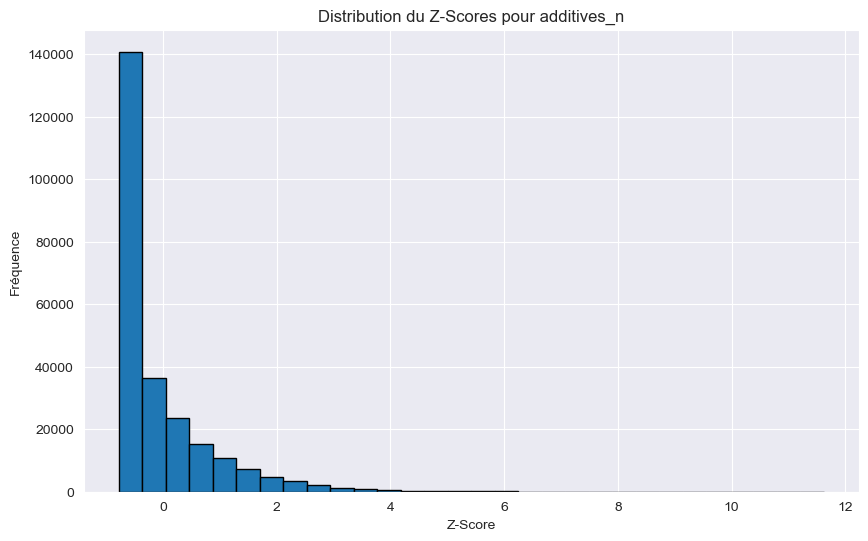

IQR : Limite basse : -4.5, Limite haute : 7.5


In [14]:
# Autre exemple de moyen d'identifier des valeurs aberrantes : z-score et l'IQR
from scipy import stats
# Pour le z-score
variable_name = 'additives_n'
data = data.dropna(subset=[variable_name])
data['z_additives_n'] = stats.zscore(data['additives_n'])
# Histogramme pour visualiser la distribution du z-score
plt.figure(figsize=(10, 6))
plt.hist(data['z_additives_n'], bins=30, edgecolor='black')
plt.title('Distribution du Z-Scores pour additives_n')
plt.xlabel('Z-Score')
plt.ylabel('Fréquence')
plt.show()
# Pour l'IQR {}
iqr = np.quantile(data['additives_n'], q=[0.25, 0.75])
limite_basse = iqr[0] - 1.5*(iqr[1] - iqr[0])
limite_haute = iqr[1] + 1.5*(iqr[1] - iqr[0])
print(f"IQR : Limite basse : {limite_basse}, Limite haute : {limite_haute}")

In [15]:
# Algorithme K-NN
# Objectif : prédire nutrition_grade_fr grâce aux variables "fat_100g", "sugars_100g", "fiber_100g", "proteins_100g"
# 1ère étape : encodage de la variable qualitative nutrition_grade_fr par mapping

# Nom de la colonne à vérifier
column_name = 'nutrition_grade_fr'

# Obtenir les différentes valeurs de la colonne spécifiée
unique_values = data[column_name].unique()
print(f"Différentes valeurs de la colonne '{column_name}':")
print(unique_values)

# Mapping de la variable nutrition_grade_fr
# Définir un dictionnaire de correspondance
mapping_nutrition_grade = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, pd.NaT: 6}

# Appliquer le mapping à la colonne nutrition_grade_fr
data['nutrition_grade_encoded'] = data['nutrition_grade_fr'].map(mapping_nutrition_grade)

# Définir un dictionnaire de correspondance
mapping_nutrition_grade = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, np.nan: None}

# Appliquer le mapping à la colonne nutrition_grade_fr
data.loc[:, 'nutrition_grade_encoded'] = data['nutrition_grade_fr'].map(mapping_nutrition_grade)

# Nom de la colonne à vérifier
column_name = 'nutrition_grade_encoded'

# Obtenir les différentes valeurs de la colonne spécifiée
unique_values = data[column_name].unique()
print(f"Différentes valeurs de la colonne '{column_name}':")
print(unique_values)

Différentes valeurs de la colonne 'nutrition_grade_fr':
['d' 'b' nan 'c' 'a' 'e']
Différentes valeurs de la colonne 'nutrition_grade_encoded':
[ 4.  2. nan  3.  1.  5.]


/var/folders/xt/s64lptzd6js02z9ywj1ydl8m0000gn/T/ipykernel_40666/3951071740.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['nutrition_grade_encoded'] = data['nutrition_grade_fr'].map(mapping_nutrition_grade)


In [16]:
# 2ème étape : travailler sur un sous-ensemble du jeu de données
new_df2 = data[["nutrition_grade_encoded", "fat_100g", "sugars_100g", "fiber_100g", "proteins_100g"]].head(700)
new_df2.shape
new_df2.head

<bound method NDFrame.head of      nutrition_grade_encoded  fat_100g  sugars_100g  fiber_100g  proteins_100g
1                        4.0     28.57    14.290000         3.6           3.57
2                        2.0     17.86    17.860000         7.1          17.86
3                        4.0     57.14     3.570000         7.1          17.86
4                        NaN      1.43    15.985449         5.7           8.57
5                        NaN     18.27    11.540000         7.7          13.46
..                       ...       ...          ...         ...            ...
849                      5.0     26.32    47.370000         5.3           5.26
850                      5.0     37.21    37.210000         4.6          11.63
851                      5.0     19.05    50.000000         0.0           4.76
852                      5.0     23.81    47.620000         0.0           4.76
853                      5.0     25.71    65.710000         0.0           2.86

[700 rows x 5 columns

In [17]:
# Remplacement des valeurs négatives et supérieures à 100 par la moyenne
to_be_treated_columns = ["fat_100g", "sugars_100g", "fiber_100g", "proteins_100g"]
for column in to_be_treated_columns :
    # Remplace les valeurs négatives et supérieures à 100 par une valeur manquante
    new_df2[column] = np.where((new_df2[column] < 0) | (new_df2[column] > 100), np.nan, new_df2[column])
    
    # Calcule la moyenne en excluant les valeurs manquantes
    mean_value = new_df2[column].mean(skipna=True)

    # Remplace les valeurs manquantes par la moyenne
    new_df2[column] = new_df2[column].fillna(mean_value)

In [18]:
# Placement de la première colonne que l'on veut prédire à la dernière place du dataframe
# Liste du nom des colonnes
columns = new_df2.columns.tolist()

# La première colonne passe à la dernière place
new_order = columns[1:] + [columns[0]]

# Ré-arrangement des colonnes du Dataframe
new_df2 = new_df2[new_order]

print(new_df2.head)

<bound method NDFrame.head of      fat_100g  sugars_100g  fiber_100g  proteins_100g  nutrition_grade_encoded
1       28.57    14.290000         3.6           3.57                      4.0
2       17.86    17.860000         7.1          17.86                      2.0
3       57.14     3.570000         7.1          17.86                      4.0
4        1.43    15.985449         5.7           8.57                      NaN
5       18.27    11.540000         7.7          13.46                      NaN
..        ...          ...         ...            ...                      ...
849     26.32    47.370000         5.3           5.26                      5.0
850     37.21    37.210000         4.6          11.63                      5.0
851     19.05    50.000000         0.0           4.76                      5.0
852     23.81    47.620000         0.0           4.76                      5.0
853     25.71    65.710000         0.0           2.86                      5.0

[700 rows x 5 columns

In [19]:
new_df2 = new_df2.dropna(subset=['nutrition_grade_encoded'])
missing_percentage = (new_df2["nutrition_grade_encoded"].isnull().sum() / len(new_df2["nutrition_grade_encoded"])) * 100
print(f"Pourcentage de valeurs manquantes dans la variable 'nutrition_grade_encoded': {missing_percentage:.2f}%")

Pourcentage de valeurs manquantes dans la variable 'nutrition_grade_encoded': 0.00%


In [20]:
# Division en un ensemble d'entraînement et un ensemble de test
X = new_df2.iloc[:, [0, 4]]
y = new_df2.iloc[:, 4]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

In [21]:
# Mise à l'échelle
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [22]:
# Pour définir quel K choisir -- racine carrée du nombre de données
import math
math.sqrt(len(y_test))

9.219544457292887

In [23]:
# Définition du modèle K-NN -- on choisit k = 9 pour avoir un nombre impair
classifier = KNeighborsClassifier(n_neighbors = 9, p = 5, metric = "euclidean")

In [24]:
# Entrainement du modèle
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9, p=5)

In [25]:
# Prédiction des résultats sur le set de test
y_pred = classifier.predict(X_test)
y_pred

array([4., 3., 5., 3., 4., 2., 1., 5., 4., 2., 4., 4., 4., 5., 4., 5., 3.,
       3., 4., 4., 3., 3., 4., 5., 2., 4., 3., 5., 3., 4., 3., 4., 4., 4.,
       5., 4., 5., 3., 4., 1., 4., 5., 5., 5., 4., 4., 4., 3., 3., 5., 4.,
       4., 2., 3., 4., 4., 2., 5., 5., 2., 4., 4., 2., 4., 4., 1., 4., 4.,
       5., 4., 3., 4., 3., 5., 5., 5., 4., 4., 3., 3., 5., 4., 4., 4., 2.])

In [26]:
# Evaluation du modèle
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 3  0  0  0  0]
 [ 0  8  0  1  0]
 [ 0  0 17  1  0]
 [ 0  0  0 36  0]
 [ 0  0  0  0 19]]


In [27]:
f1_micro = f1_score(y_test, y_pred, average='micro')
print(f1_micro)

0.9764705882352941


Mode du nutriscore_fr pour 100g : 0    0.0
Name: nutrition-score-fr_100g, dtype: float64
Moyenne du nutriscore_fr pour 100g : 9.145657792118422
Mediane du nutriscore_fr pour 100g : 10.0
Variation pour nutriscore_fr pour 100g : 82.14000901519172
Ecart-type pour nutriscore_fr pour 100g : 9.06313564483182


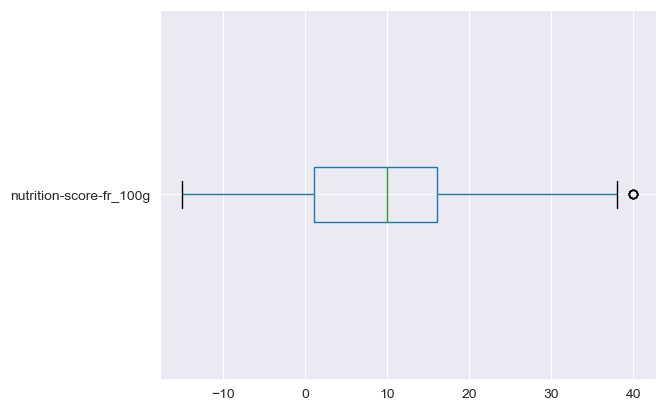

Skewness empirique pour nutriscore_fr pour 100g : 0.10488246879715692
Kurtosis empirique pour nutriscore_fr pour 100g : -1.024226573835764


In [28]:
# Analyse univariée nutrition-score-fr_100g

# Mode, moyenne et médiane pour nutrition-score-fr_100g
mode_nutrition_score_fr = data["nutrition-score-fr_100g"].mode()
print(f"Mode du nutriscore_fr pour 100g : {mode_nutrition_score_fr}")

moyenne_nutrition_score_fr = data["nutrition-score-fr_100g"].mean()
print(f"Moyenne du nutriscore_fr pour 100g : {moyenne_nutrition_score_fr}")

mediane_nutrition_score_fr = data["nutrition-score-fr_100g"].median()
print(f"Mediane du nutriscore_fr pour 100g : {mediane_nutrition_score_fr}")

# Variation pour nutrition-score-fr_100g
variation_nutriscore_fr = data["nutrition-score-fr_100g"].var(ddof=0)
ecart_type_nutriscore_fr = data["nutrition-score-fr_100g"].std()
print(f"Variation pour nutriscore_fr pour 100g : {variation_nutriscore_fr}")
print(f"Ecart-type pour nutriscore_fr pour 100g : {ecart_type_nutriscore_fr}")

# Boxplot pour nutrition-score-fr_100
data.boxplot(column="nutrition-score-fr_100g", vert=False)
plt.show()

# Skewness
skewness_nutrition_score_fr = data['nutrition-score-fr_100g'].skew()
kurtosis_nutrition_score_fr = data['nutrition-score-fr_100g'].kurtosis()
print(f"Skewness empirique pour nutriscore_fr pour 100g : {skewness_nutrition_score_fr}")
print(f"Kurtosis empirique pour nutriscore_fr pour 100g : {kurtosis_nutrition_score_fr}")

depenses = data[data['nutrition-score-fr_100g'] < 0]
dep = -depenses['nutrition-score-fr_100g'].values
n = len(dep)

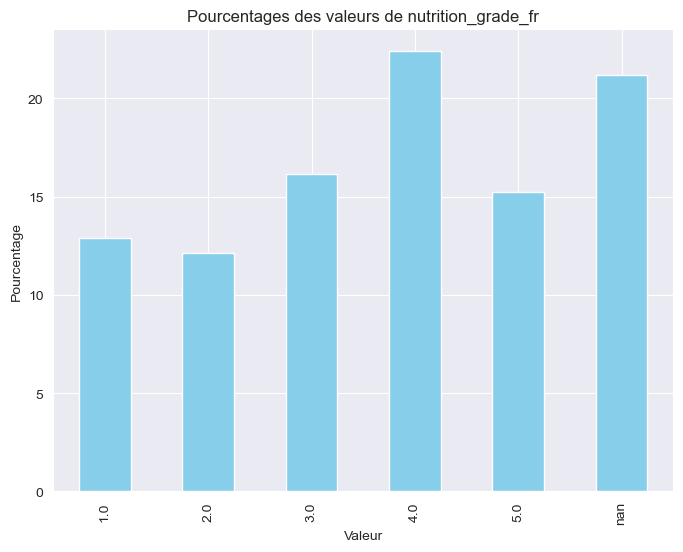

In [29]:
# Analyse univariée de la variable qualitative nutrition_grade_fr
# La variable a précédemment été encodé par mapping au sein de la nouvelle variable nutrition_grade_encoded

# Calcule des pourcentages de chaque valeur et de valeurs manquantes
value_percentages = data['nutrition_grade_encoded'].value_counts(normalize=True, dropna=False) * 100

# Afficher un diagramme à barres des pourcentages
plt.figure(figsize=(8, 6))
value_percentages.sort_index().plot(kind='bar', color='skyblue')
plt.title('Pourcentages des valeurs de nutrition_grade_fr')
plt.xlabel('Valeur')
plt.ylabel('Pourcentage')
plt.show()

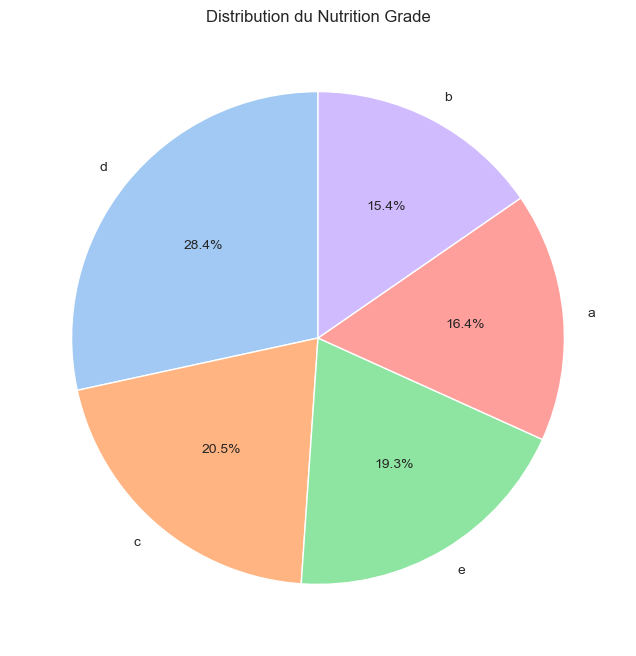

In [30]:
# Piechart pour nutrition_grade_fr sans les valeurs manquantes
plt.figure(figsize=(8, 8))
data['nutrition_grade_fr'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), wedgeprops=dict(width=1.0))
plt.title('Distribution du Nutrition Grade')
plt.ylabel('')
plt.show()

In [31]:
# Mode de la variable qualitative nutrition_grade_fr
data['nutrition_grade_encoded'].mode()

0    4.0
Name: nutrition_grade_encoded, dtype: float64

In [32]:
# Moyenne de la variable qualitative nutrition_grade_fr
data['nutrition_grade_encoded'].mean()

3.1892965098201134

In [33]:
# Médiane de la variable qualitative nutrition_grade_fr
data["nutrition_grade_encoded"].median()

3.0

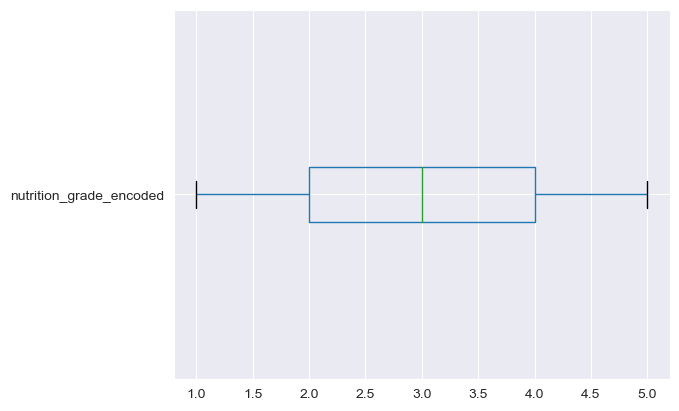

In [34]:
# Boxplot de la variable nutrition_grade_encoded
data.boxplot(column="nutrition_grade_encoded", vert=False)
plt.show()

In [35]:
# Variation empirique
data['nutrition_grade_encoded'].var(ddof=0)

1.8302890972599541

In [36]:
# Ecart-type empirique
data['nutrition_grade_encoded'].std()

1.35288522314227

In [37]:
# Coefficient de variation
data["nutrition_grade_encoded"].std()/data['nutrition_grade_encoded'].mean()

0.4241954985924395

In [38]:
# Skewness : si y1 < 0 la distribution est étalée à gauche
data['nutrition_grade_encoded'].skew()

-0.27455410754007986

In [39]:
# Kurtosis : si y2 < 0 la distribution est plus aplatie que la distribution normale
data['nutrition_grade_encoded'].kurtosis()

-1.1280669284398166

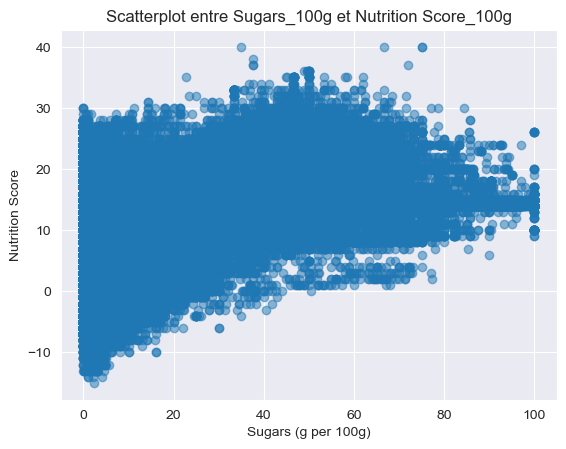

In [40]:
# Analyse bivariée variable quantitative et quantitative
# Créer un scatterplot
plt.scatter(data['sugars_100g'], data['nutrition-score-fr_100g'], alpha=0.5)

# Ajouter des étiquettes et un titre
plt.xlabel('Sugars (g per 100g)')
plt.ylabel('Nutrition Score')
plt.title('Scatterplot entre Sugars_100g et Nutrition Score_100g')

# Afficher le scatterplot
plt.show()

In [41]:
# Analyse bivariée entre sugar_100g et nutrition-score-fr_100g -- Calcul du coefficient de Pearson
from scipy.stats import pearsonr

# Supprimer les lignes avec des valeurs manquantes dans les colonnes pertinentes
data_cleaned = data[['sugars_100g', 'nutrition-score-fr_100g']].dropna()

# Sélectionner les colonnes pertinentes après suppression des valeurs manquantes
sugar_column = data_cleaned['sugars_100g']
nutrition_score_column = data_cleaned['nutrition-score-fr_100g']

# Calculer le coefficient de corrélation de Pearson et la p-value
coefficient_pearson, p_value = pearsonr(sugar_column, nutrition_score_column)

# Afficher le résultat
print(f"Le coefficient de corrélation de Pearson entre sugars_100g et nutrition_score_fr_100g est : {coefficient_pearson}")
print(f"La p-value associée est : {p_value}")

# Vous pouvez également interpréter le coefficient de Pearson, par exemple :
if coefficient_pearson > 0:
    print("Il y a une corrélation positive.")
elif coefficient_pearson < 0:
    print("Il y a une corrélation négative.")
else:
    print("Il n'y a pas de corrélation linéaire.")

Le coefficient de corrélation de Pearson entre sugars_100g et nutrition_score_fr_100g est : 0.47220392212604223
La p-value associée est : 0.0
Il y a une corrélation positive.


In [42]:
# Analyse bivariée entre deux variables qualitatives -- pnns_groups_1 et nutrition_grade_fr 
# Créer un tableau de contingence
table_contingence = pd.crosstab(data["pnns_groups_1"], data['nutrition_grade_fr'])

# Afficher le tableau de contingence
print("Tableau de contingence :\n", table_contingence)

Tableau de contingence :
 nutrition_grade_fr          a     b     c     d     e
pnns_groups_1                                        
Beverages                 229   692  1232   705  1742
Cereals and potatoes     3127   938  1220   734    96
Composite foods          1208  1629  1470   804    66
Fat and sauces             90   221   885  1488   606
Fish Meat Eggs            489   684  1375  1473   995
Fruits and vegetables    2202   550   430    47     3
Milk and dairy products   575  1229  1516  2606   239
Salty snacks               52    77   599  1060   334
Sugary snacks              61   301   757  3089  4464
cereals-and-potatoes       12     1     0     0     0
fruits-and-vegetables     528    93    27     0     0
salty-snacks                1     0     0     0     0
sugary-snacks               0     5    27   236    71
unknown                  1230  1408  1932  2320  1375


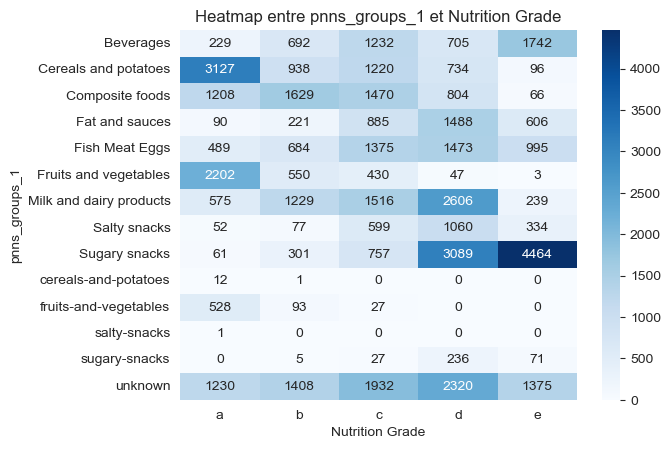

In [43]:
# Créer une heatmap
sns.heatmap(table_contingence, annot=True, fmt='d', cmap='Blues')

# Ajouter des étiquettes et un titre
plt.xlabel('Nutrition Grade')
plt.ylabel('pnns_groups_1')
plt.title('Heatmap entre pnns_groups_1 et Nutrition Grade')

# Afficher la heatmap
plt.show()

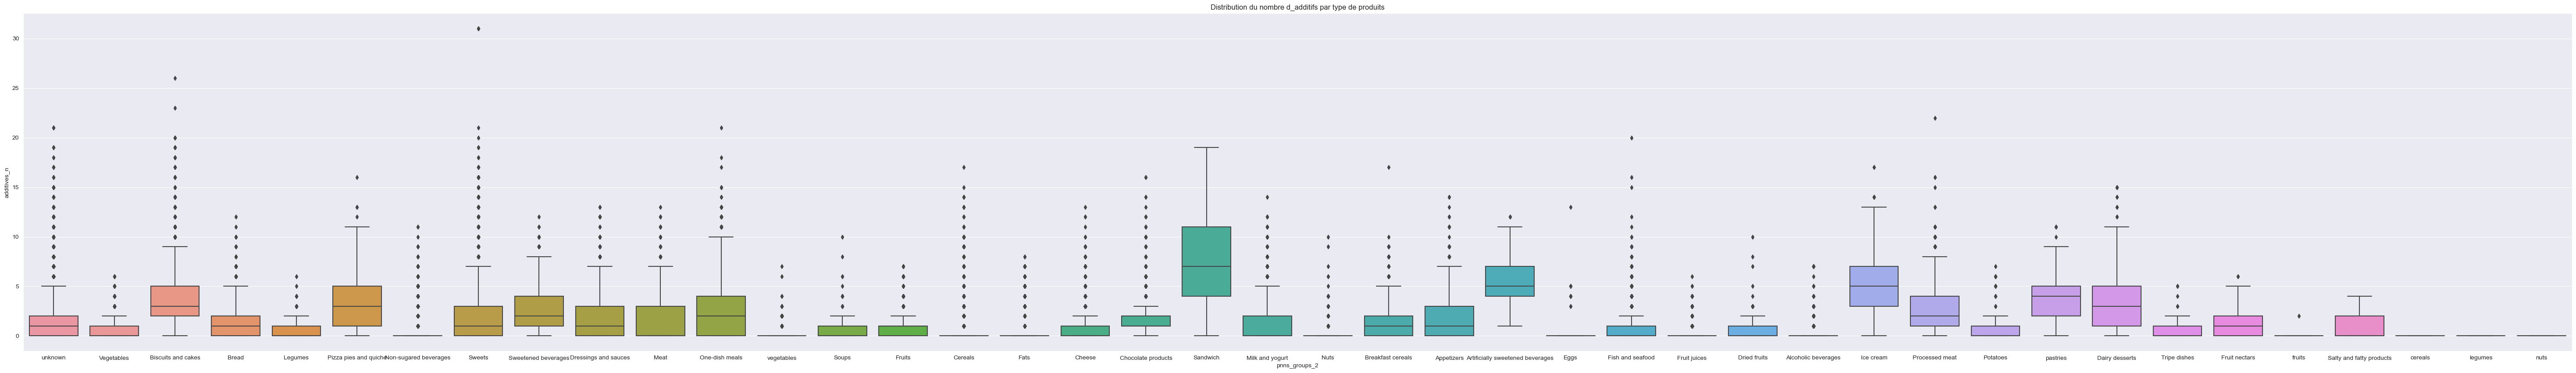

In [44]:
# Analyse bivariée entre une variable quantitative (additives_n) et une variable qualitative (pnns_groups_2)
plt.figure(figsize=(75,10))
sns.boxplot(x='pnns_groups_2', y='additives_n', data=data)
plt.title("Distribution du nombre d_additifs par type de produits")
plt.show()

In [45]:
# Supprimer les lignes avec des valeurs manquantes dans la variable spécifiée
data.dropna(subset=["pnns_groups_1"], inplace=True)
data.dropna(subset=["nutrition_grade_fr"], inplace=True)
# Afficher la forme du dataframe après la suppression des valeurs manquantes
print(f"Nouvelle forme du DataFrame : {data.shape}")

# ANOVA avec en variable dépendante : fat_100g, et en variable indépendante : nutrition_grade_fr et pnns_groups_1
anova_variete_phyto = smf.ols('fat_100g~nutrition_grade_fr*pnns_groups_1', data=data).fit()
print(anova_variete_phyto.summary())
# Test post-hoc de Fisher
sm.stats.anova_lm(anova_variete_phyto)

/var/folders/xt/s64lptzd6js02z9ywj1ydl8m0000gn/T/ipykernel_40666/548094678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=["pnns_groups_1"], inplace=True)
/var/folders/xt/s64lptzd6js02z9ywj1ydl8m0000gn/T/ipykernel_40666/548094678.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=["nutrition_grade_fr"], inplace=True)


Nouvelle forme du DataFrame : (53655, 148)
                            OLS Regression Results                            
Dep. Variable:               fat_100g   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     1093.
Date:                Mon, 09 Sep 2024   Prob (F-statistic):               0.00
Time:                        13:18:40   Log-Likelihood:            -2.0624e+05
No. Observations:               53655   AIC:                         4.126e+05
Df Residuals:                   53595   BIC:                         4.131e+05
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

,df,sum_sq,mean_sq,F,PR(>F)
nutrition_grade_fr,4.0,4.119464e+06,1.029866e+06,8055.086928,0.0
pnns_groups_1,13.0,2.976101e+06,2.289309e+05,1790.580709,0.0
nutrition_grade_fr:pnns_groups_1,52.0,1.152970e+06,2.217250e+04,173.421996,0.0
Residual,53595.0,6.852274e+06,1.278529e+02,NaN,NaN


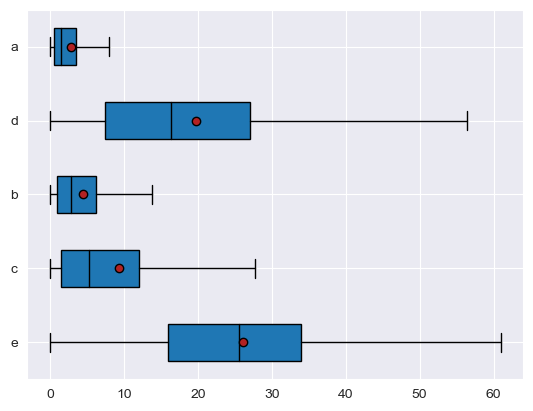

In [46]:
# Boxplot des variables "nutrition_grade_fr" et "saturated-fat_100g"
X = "nutrition_grade_fr"  # qualitative
Y = "fat_100g"  # quantitative

# Extrait les valeurs uniques de la variable qualitative
modalites = data[X].unique()

# Prepare les données pour le boxplot
groupes = [data[data[X] == m][Y] for m in modalites]

medianprops = {'color': "black"}
meanprops = {'marker': 'o', 'markeredgecolor': 'black',
             'markerfacecolor': 'firebrick'}

# Creation du boxplot
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops,
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

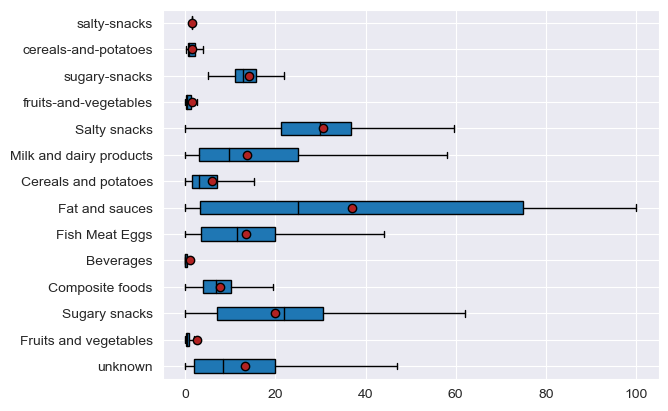

In [47]:
# Boxplot des variables "nutrition_grade_fr" et "saturated-fat_100g"
X = "pnns_groups_1"  # qualitative
Y = "fat_100g"  # quantitative

# Extrait les valeurs uniques de la variable qualitative
modalites = data[X].unique()

# Prepare les données pour le boxplot
groupes = [data[data[X] == m][Y] for m in modalites]

medianprops = {'color': "black"}
meanprops = {'marker': 'o', 'markeredgecolor': 'black',
             'markerfacecolor': 'firebrick'}

# Creation du boxplot
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops,
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [48]:
# ACP avec les variables : "fat_100g", "sugars_100g", "fiber_100g", "proteins_100g", "nutrition-score-fr_100g"
cols = ["fat_100g", "sugars_100g", "fiber_100g", "proteins_100g", "nutrition-score-fr_100g"]

# Vérification que les colonnes n'ont pas de valeurs manquantes
missing_columns = [col for col in cols if data[col].isna().any()]

if missing_columns:
    print("Colonnes avec valeurs manquantes:", missing_columns)
else:
    print("Aucune colonne n'a de valeurs manquantes.")

Aucune colonne n'a de valeurs manquantes.


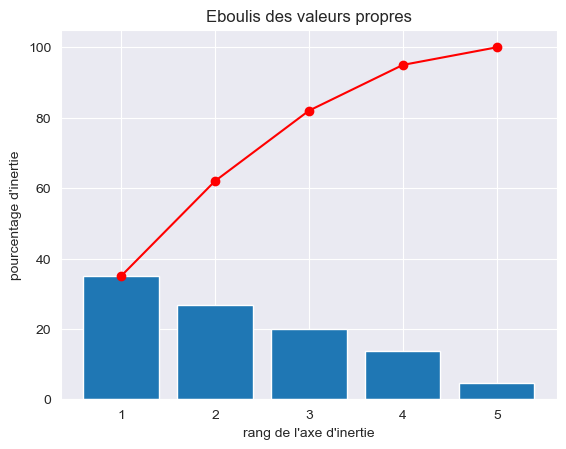

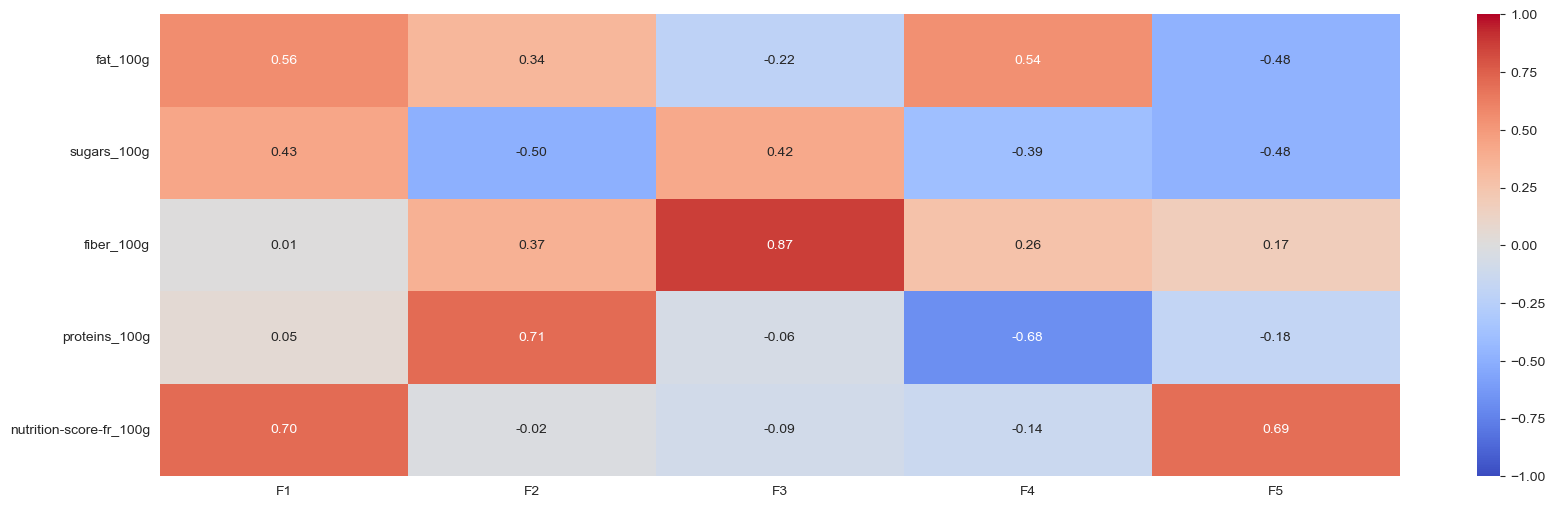

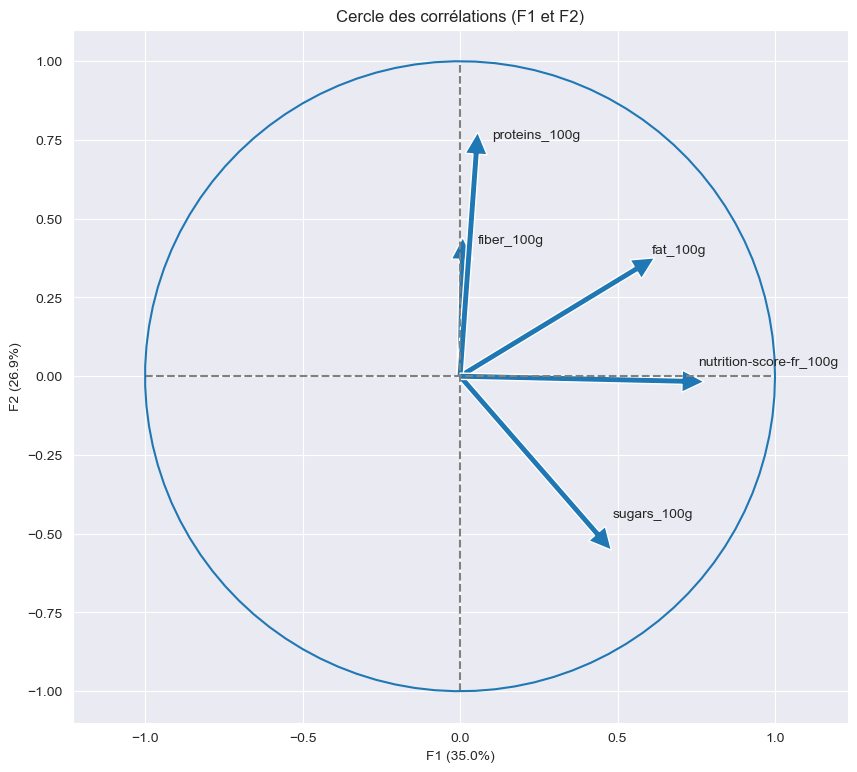

In [49]:
cols = ["fat_100g", "sugars_100g", "fiber_100g", "proteins_100g", "nutrition-score-fr_100g"]
df = data[cols]

X = df.values

# Lignes enregistrées dans la variable names
names = df.index

# Colonnes enregistrées dans features
features = df.columns

# Début de l'ACP - On scale les données
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

scaler = StandardScaler()

scaler.fit(X)

# On transforme
X_scaled = scaler.transform(X)

# La moyenne est de 0 et l'écart-type est de 1
idx = ["mean", "std"]
pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

# On travaille sur toutes les variables
n_components = 5

# On instancie l'ACP
pca = PCA(n_components=n_components)

# On l'entraîne sur les données scalées
pca.fit(X_scaled)

# Calcul de la variance captée par chaque nouvelle composante et visualisation
pca.explained_variance_ratio_
scree = (pca.explained_variance_ratio_*100).round(2)
scree
scree_cum = scree.cumsum().round()
scree_cum
x_list = range(1, n_components+1)
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

pcs = pca.components_
pcs
pcs = pd.DataFrame(pcs)
pcs
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

pcs.T

fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
x, y = 0,1
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Fais commencer la flèche à l'origine
             pca.components_[0, i],  #0 pour PC1
             pca.components_[1, i],  #1 pour PC2
             head_width=0.07,
             head_length=0.07,
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])

# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))
plt.axis('equal')
plt.show(block=False)

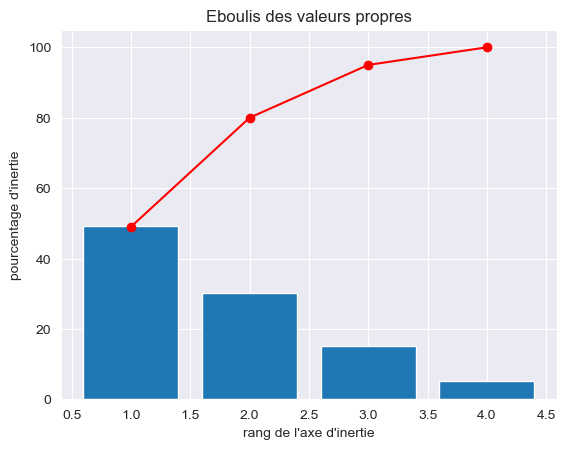

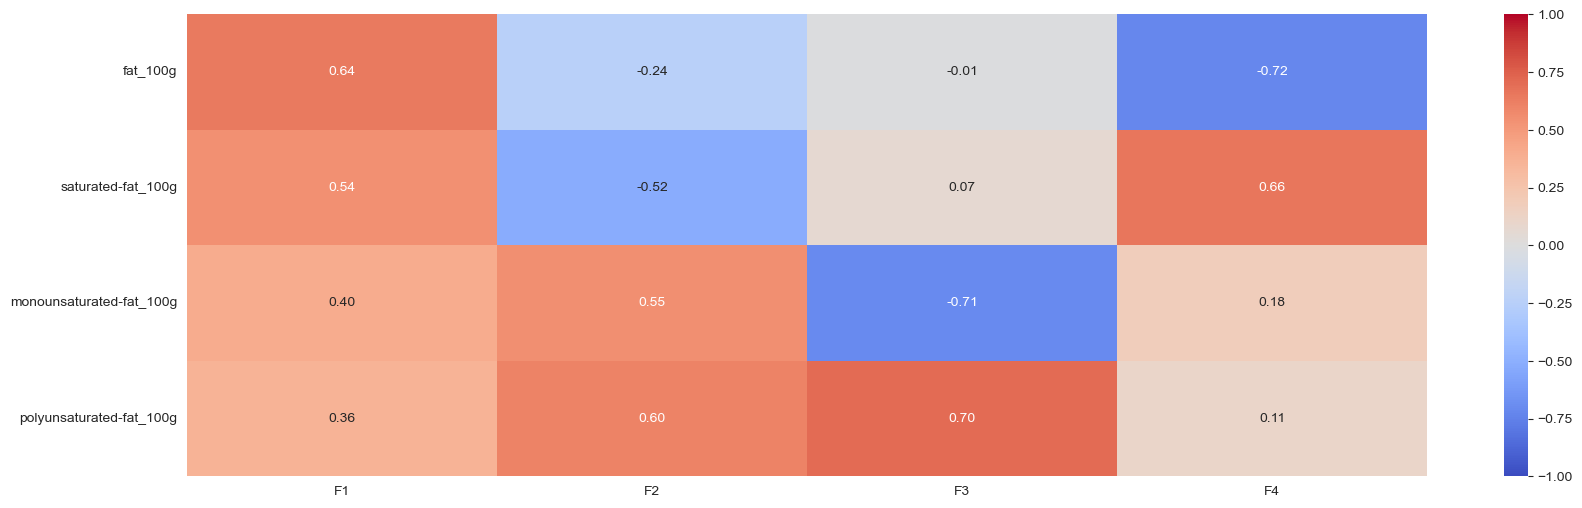

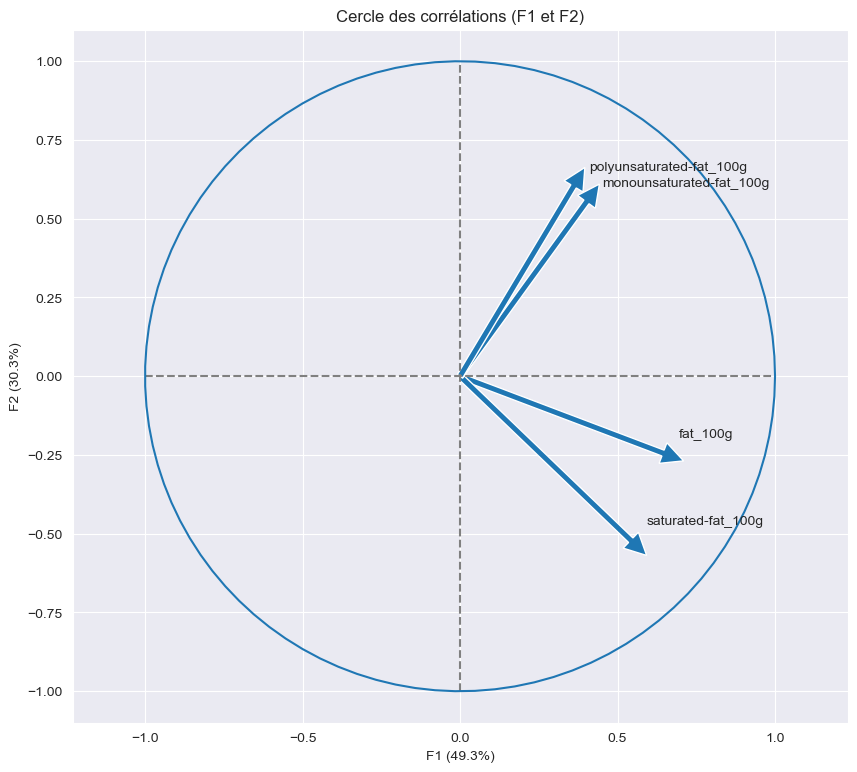

In [50]:
# Autre exemple d'ACP sur les variables : "fat_100g", "saturated-fat_100g", "monounsaturated-fat_100g", "polyunsaturated-fat_100g"
cols = ["fat_100g", "saturated-fat_100g", "monounsaturated-fat_100g", "polyunsaturated-fat_100g"]
df = data[cols]

X = df.values

# Lignes enregistrées dans la variable names
names = df.index

# Colonnes enregistrées dans features
features = df.columns

# Début de l'ACP - On scale les données
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

scaler = StandardScaler()

# On fit
scaler.fit(X)

# On transforme
X_scaled = scaler.transform(X)

# La moyenne est bien de 0 et l'écart-type est de 1
idx = ["mean", "std"]
pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

# On travaille sur toutes les variables
n_components = 4

# On instancie l'ACP
pca = PCA(n_components=n_components)

# On l'entraîne sur les données scalées
pca.fit(X_scaled)

# Variance captée par chaque nouvelle composante
pca.explained_variance_ratio_
scree = (pca.explained_variance_ratio_*100).round(2)
scree
scree_cum = scree.cumsum().round()
scree_cum
x_list = range(1, n_components+1)
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

pcs = pca.components_
pcs
pcs = pd.DataFrame(pcs)
pcs
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

pcs.T

fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
x, y = 0,1
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Fais commencer la flèche à l'origine
             pca.components_[0, i],  #0 pour PC1
             pca.components_[1, i],  #1 pour PC2
             head_width=0.07,
             head_length=0.07,
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])

# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))
plt.axis('equal')
plt.show(block=False)